In [1]:
import cv2
import matplotlib.pyplot as plt 
from PIL import Image, ImageOps, ImageShow
import numpy as np

In [2]:
import pathlib
current_dir = pathlib.Path.cwd()
image_file = pathlib.Path.joinpath(current_dir,"Lenna.png")

# def read_grayscale_image_as_numpy_array(image_path,ignore= 0):
#     with Image.open(image_path) as grayImage:
#         data = grayImage.getdata()
#         np_image = np.array(data)
#         np_image.resize(grayImage.width, grayImage.height)
#         return np_image

def read_image_as_numpy_array(image_path) :
    with Image.open(image_path) as image:
        np_image = np.array(image)
        return np_image

def read_image_channel_as_numpy_array(image_path, channel=0, useGrayScale=False) :
    with Image.open(image_path) as image:
        print(f"gray?{useGrayScale}")
        channel_data = []
        if useGrayScale is True:
            gray_image = ImageOps.grayscale(image)
            channel_data = gray_image.getdata(0)
        else:
            channel_data = image.getdata(channel)
        #image.getchannel("R")
        np_image = np.array(channel_data)
        np_image.resize( (image.width, image.height) )
        return np_image
        
def show_histogram(input_array, plotColor = 'green' ,num_bins = 255, titlePlot = 'ColorMap', yLabel = 'Freq', xLabel='Intensity') :
   
     input_array = input_array.reshape( (-1,1))
     n, bins, patches = plt.hist(input_array, num_bins, cumulative=False,
                              density = 2, 
                              color = plotColor,
                              alpha = 0.7)
     plt.xlabel(xLabel)
     plt.ylabel(yLabel)

     plt.title(titlePlot, fontweight ="bold")

gray?False
gray?False
gray?False


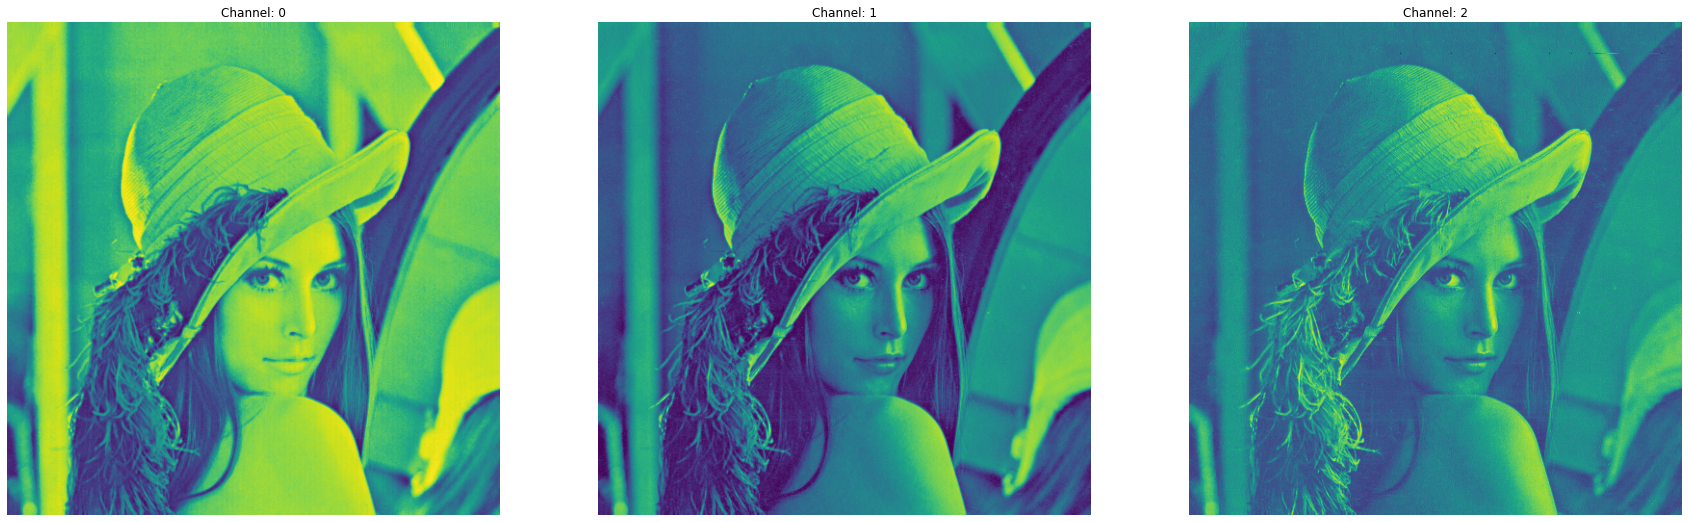

In [3]:
# show different channels
plt.figure( figsize=(30,20))
useGrayScale = False

channels_data = [read_image_channel_as_numpy_array(image_file, i , useGrayScale=useGrayScale) for i in range(3)]
(red,green,blue) = channels_data

for row in range(1):
    for i in range(3):
        plt.subplot(2,3, row*3 + i +1)
        plt.title(f"Channel: {i}")
        if useGrayScale:
            plt.imshow(channels_data[i],cmap='gray')
        else:
            plt.imshow(channels_data[i])
        plt.axis("off")


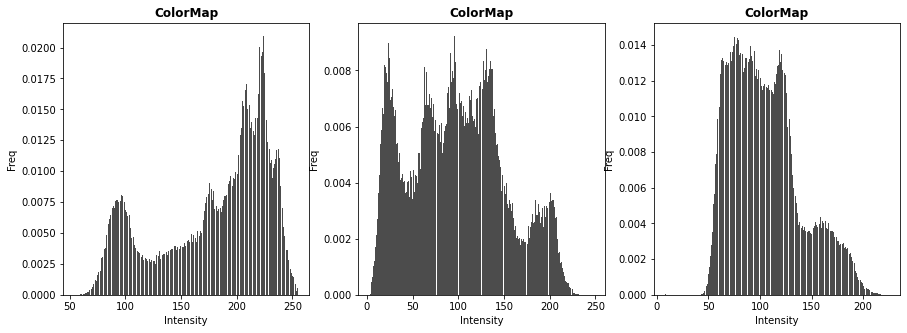

In [5]:
plt.figure(figsize=(15,5))


for i in range(3):
    channel = channels_data[i]
    plt.subplot(1,3,i+1)
    show_histogram(channel, plotColor= 'black')

Channel Histograms: 


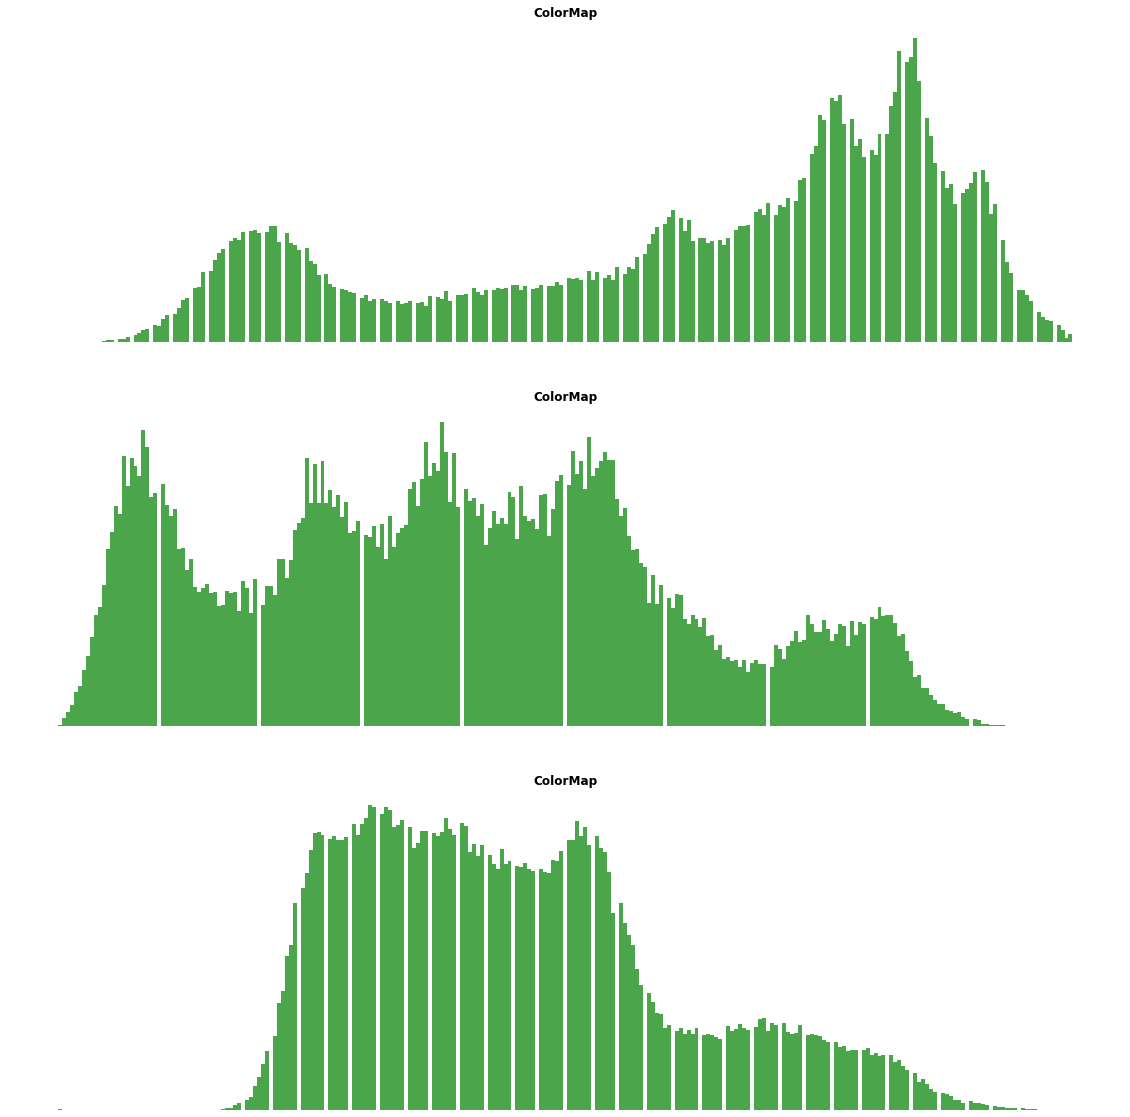

In [6]:



#show_histogram(blue)
print("Channel Histograms: ")
plt.figure(figsize=(20,20))
for i in range(3):
    plt.subplot(3,1, i+1)
    plt.title(f"Channel: {i}")
    plt.xlabel("pixels")
    plt.ylabel("Freq")
    show_histogram(channels_data[i])

    plt.axis("off")

In [7]:


#draw_histogram_better(channels_data[2])

(512, 512)


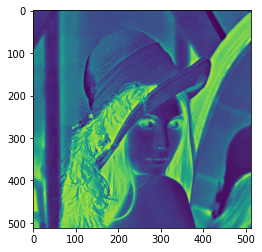

In [8]:

def invert_image(image_2d_array):
    inverted_image = 255 - image_2d_array
    return inverted_image

inverted_red = invert_image(red)
print(inverted_red.shape)
#plt.imshow(np_image)

plt.imshow(invert_image(red))

In [9]:


def lambda_test( lambda_to_execute ):
    hello = lambda : lambda_to_execute()
    hello()

x = lambda_test
lambda_test( lambda : print(10))



10


Inverted Channels: 


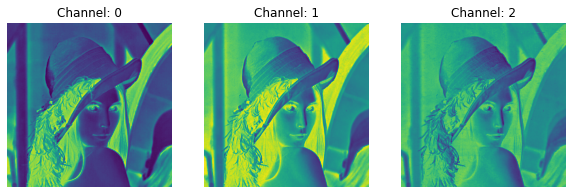

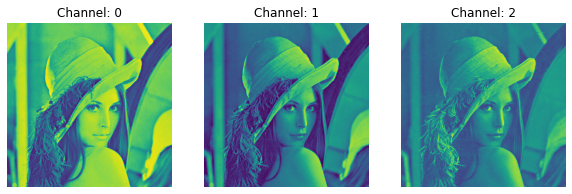

In [10]:
def execute_custom_operation( input_lambda, subplot_row=1, subplot_column =3):
    plt.figure( figsize=(10,10) )

    for i in range(3):
        plt.subplot( subplot_row, subplot_column, i+1)
        input_lambda(i)

def figure_channel_wrapper(index, lambda_to_execute):
    plt.title(f"Channel: {index}")
    lambda_to_execute(index)
    plt.axis("off")

def plot_channel(index):
    figure_channel_wrapper( index, lambda x:
        plt.imshow(channels_data[x])
    )

def plot_inverted_channel(index):

    def invert_and_show(index):
        inverted_data = invert_image(channels_data[index])
        plt.imshow(inverted_data)

    figure_channel_wrapper( index, (lambda x: 
            invert_and_show(x)
        )
    )

print("Inverted Channels: ")
execute_custom_operation( lambda x: plot_inverted_channel(x), subplot_row=1 )

execute_custom_operation( lambda x: plot_channel(x), subplot_row=2 )

In [11]:
import pathlib
current_dir = pathlib.Path.cwd()
image_file = pathlib.Path.joinpath(current_dir,"dark_image.png")

(563, 564)


(-0.5, 563.5, 562.5, -0.5)

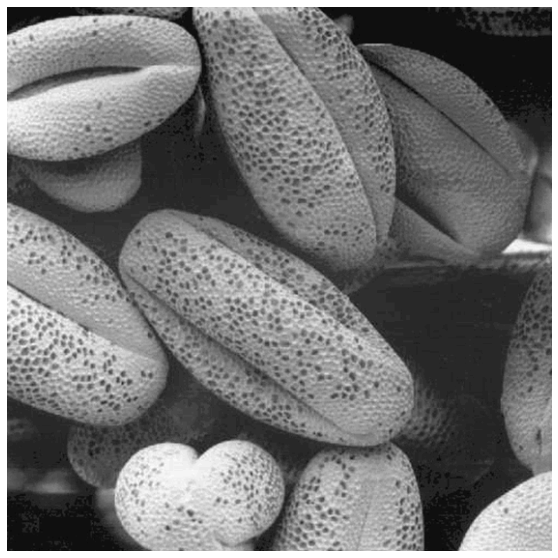

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,10))
image = Image.open(image_file).convert("L")
image_array = np.array(image)

#image_array = 255 - image_array

print(image_array.shape)

plt.subplot(1,1,1)
plt.imshow(image_array,cmap='gray')

plt.axis("off")

In [15]:


def manipulate(image_array, x_index, y_index, execute):
    a = image_array
    i,j = x_index, y_index

    input_array = [ a[i-1, j-1] , a[i, j-1] , a[i+1,j-1]
             , a[i-1, j] , a[i, j] , a[i+1,j]
            , a[i-1, j+1] , a[i, j+1] , a[i+1,j+1]
            ]

    return execute(input_array)

    # return int(np.sum(input_array)/len(input_array))

    # result: np.int16 = (a[i-1, j-1] + a[i, j-1] + a[i+1,j-1]
    #          + a[i-1, j] + a[i, j] + a[i+1,j]
    #         + a[i-1, j+1] + a[i, j+1] + a[i+1,j+1]
    #         )
    # return int(result/9)

def max_pixel(image_array, x_index, y_index):
    maximizer = lambda arr :  np.median(arr)#np.amin(arr)
    return manipulate(image_array, x_index, y_index,maximizer)

def avg_pixel(image_array, x_index, y_index):
    averager = lambda arr : int(sum(arr)/len(arr))
    return manipulate(image_array, x_index, y_index,averager)

def laplacian(image_array, x_index, y_index):
    filter_array = [ 0 , -1 , 0,
                     -1, 5, -1,
                     0, -1, 0] 

    def filter(arr):
        s = np.ceil(np.sum(np.array(arr)*np.array(filter_array))/9)
        #print(arr, filter_array, s)
        return s

    #filter = lambda arr : 
    return manipulate(image_array, x_index, y_index,filter)

def filter_out(image_array, filter_operation):
    width,height = image_array.shape
    
    for i in range(1,width-1):
        for j in range(1,height-1):
            image_array[i,j] = filter_operation(image_array, i, j)

(563, 564)


ValueError: num must be 1 <= num <= 6, not 0

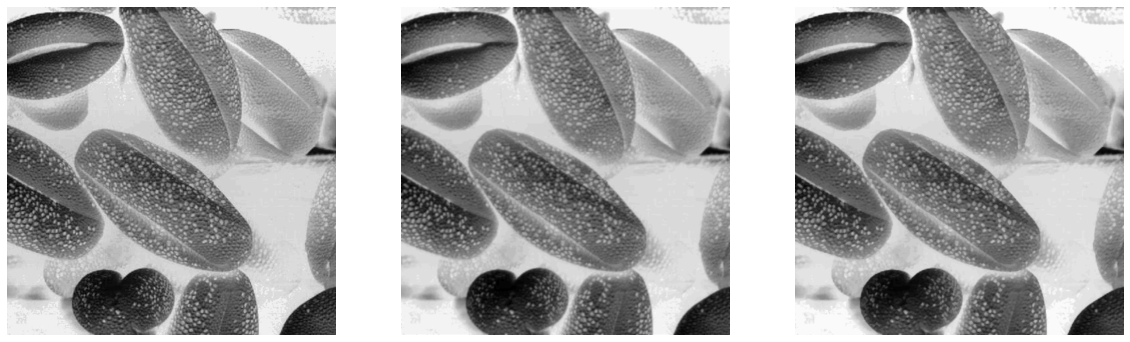

In [19]:

plt.figure(figsize=(20,20))
copy_image = 255 - np.array(image_array)
print(copy_image.shape)

plt.subplot(1,3,1)
plt.imshow(copy_image,cmap='gray')
plt.axis("off")

filter_out(copy_image,avg_pixel)

plt.subplot(1,3,2)
plt.imshow(copy_image,cmap='gray')
plt.axis("off")

copy_image = 255 - np.array(image_array)
filter_out(copy_image,max_pixel)

plt.subplot(1,3,3)
plt.imshow(copy_image,cmap='gray')
plt.axis("off")

#copy_image = 255 - np.array(image_array)
copy_image = np.copy(image_array)
filter_out(copy_image,laplacian)

plt.subplot(2,3,0)
plt.imshow(copy_image,cmap='gray')
plt.axis("off")



(-0.5, 563.5, 562.5, -0.5)

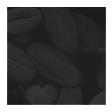